# Topic - Messy Vs Clean Room

Mudit Chugh<br>
18CSU131

## Objective - To Predict Whether the Room is Messy or clean using Deep Learning

## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from tqdm import tqdm 
from PIL import Image
import cv2
import os

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Importing dataset

In [4]:
train_messy = "C:/Users/mudit/Desktop/Deep Learning/images/train/messy"
train_clean= "C:/Users/mudit/Desktop/Deep Learning/images/train/clean"

In [5]:
test_messy= "C:/Users/mudit/Desktop/Deep Learning/images/val/messy"
test_clean= "C:/Users/mudit/Desktop/Deep Learning/images/val/clean"
image_size = 128

### Messy Room Image

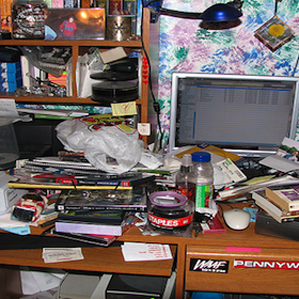

In [6]:
Image.open("images/train/messy/90.png")


### Clean Room Image

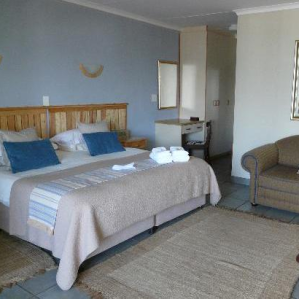

In [7]:
Image.open("images/train/clean/70.png")

### CONVERTING IMAGE TO GRAYSCALE

In [8]:
for image in tqdm(os.listdir(train_messy)): 
    path = os.path.join(train_messy, image)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img, (image_size, image_size)) 
    np_img=np.asarray(img)

100%|██████████| 96/96 [00:00<00:00, 128.85it/s]


Text(0.5, 1.0, 'Messy Room')

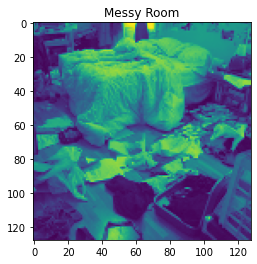

In [9]:
plt.imshow(np_img.reshape(image_size, image_size))
plt.title("Messy Room")

In [10]:
for image2 in tqdm(os.listdir(train_clean)): 
    path = os.path.join(train_clean, image2)
    img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img2 = cv2.resize(img2, (image_size, image_size))
    np_img2=np.asarray(img2)

100%|██████████| 96/96 [00:00<00:00, 140.25it/s]


Text(0.5, 1.0, 'Clean Room')

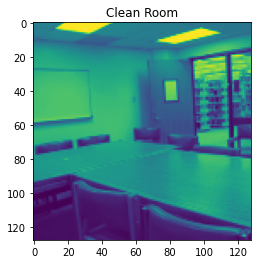

In [11]:
plt.imshow(np_img2.reshape(image_size, image_size))
plt.title("Clean Room")

## Train data

In [12]:
def train_data():
    train_data_messy = [] 
    train_data_clean=[]
    for image1 in tqdm(os.listdir(train_messy)): 
        path = os.path.join(train_messy, image)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        train_data_messy.append(img1) 
    for image2 in tqdm(os.listdir(train_clean)): 
        path = os.path.join(train_clean, image)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        train_data_clean.append(img2) 
    
    train_data= np.concatenate((np.asarray(train_data_messy),np.asarray(train_data_clean)),axis=0)
    return train_data

## Test Data

In [13]:
def test_data():
    test_data_messy = [] 
    test_data_clean=[]
    for image1 in tqdm(os.listdir(test_messy)): 
        path = os.path.join(test_messy, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        test_data_messy.append(img1) 
    for image2 in tqdm(os.listdir(test_clean)): 
        path = os.path.join(test_clean, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        test_data_clean.append(img2) 
    
    test_data= np.concatenate((np.asarray(test_data_messy),np.asarray(test_data_clean)),axis=0) 
    return test_data

In [14]:
train_data = train_data() 
test_data = test_data()

100%|██████████| 10/10 [00:00<00:00, 119.28it/s]


## Concatenating Train and Test Data

In [15]:
x_data=np.concatenate((train_data,test_data),axis=0)
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [16]:
z1 = np.zeros(96)
o1 = np.ones(96)
Y_train = np.concatenate((o1, z1), axis=0)
z = np.zeros(10)
o = np.ones(10)
Y_test = np.concatenate((o, z), axis=0)

In [17]:
y_data=np.concatenate((Y_train,Y_test),axis=0).reshape(x_data.shape[0],1)

## Image Shape

In [18]:
print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)

X shape:  (212, 128, 128)
Y shape:  (212, 1)


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

## Converting into Feature Vector

In [20]:
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

X train flatten (180, 16384)
X test flatten (32, 16384)


In [21]:
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_test = y_test.T
y_train = y_train.T

In [22]:
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (16384, 180)
x test:  (16384, 32)
y train:  (1, 180)
y test:  (1, 32)


## Logistic Regression

In [23]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iterarion):
        
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 100 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

def predict(w,b,x_test):
    
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):

    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    
    print("Test Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100,2)))
    print("Train Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100,2)))

Cost after iteration 0: nan
Cost after iteration 100: 0.032316
Cost after iteration 200: 0.014960
Cost after iteration 300: 0.009692
Cost after iteration 400: 0.007167
Cost after iteration 500: 0.005685
Cost after iteration 600: 0.004711
Cost after iteration 700: 0.004022
Cost after iteration 800: 0.003510
Cost after iteration 900: 0.003114
Cost after iteration 1000: 0.002799
Cost after iteration 1100: 0.002543
Cost after iteration 1200: 0.002330
Cost after iteration 1300: 0.002151
Cost after iteration 1400: 0.001997


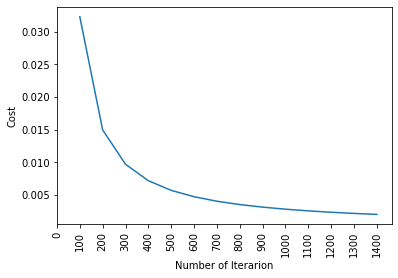

Test Accuracy: 90.62 %
Train Accuracy: 100.0 %


In [24]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 1500)

In [25]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))

train accuracy: 1.0 
test accuracy: 0.90625 


## Output Prediction made By the model

In [26]:
pred =logreg.predict(x_test.T)

In [27]:
pred

array([1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.])

## Actual Output

In [28]:
y_test

array([[1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
        0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.]])

## Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test.T,pred)

array([[16,  2],
       [ 1, 13]], dtype=int64)

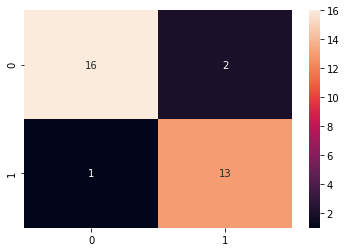

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
cm_dt= confusion_matrix(y_test.T,pred)
sns.heatmap(cm_dt, annot=True, fmt="d")

In [31]:
def parameter_initialize(x_train,y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0])*0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3)*0.1,
                  "bias2" : np.zeros((y_train.shape[0],1))}
    
    print("Shape of weight1 : ",parameters["weight1"].shape)
    print("Shape of weight2 : ",parameters["weight2"].shape)
    print("Shape of bias1 : ",parameters["bias1"].shape)
    print("Shape of bias2 : ",parameters["bias2"].shape)

    return parameters
parameter_initialize(x_train,y_train)

Shape of weight1 :  (3, 16384)
Shape of weight2 :  (1, 3)
Shape of bias1 :  (3, 1)
Shape of bias2 :  (1, 1)


{'weight1': array([[ 0.06154342, -0.00519182, -0.07318838, ..., -0.05301374,
         -0.11055103, -0.03784825],
        [ 0.07295698,  0.15878783, -0.07702929, ...,  0.04881307,
          0.05825063,  0.18818191],
        [-0.0673224 ,  0.01704522,  0.09224699, ..., -0.0100869 ,
          0.1571625 ,  0.11011127]]),
 'bias1': array([[0.],
        [0.],
        [0.]]),
 'weight2': array([[-0.04279859,  0.20734616, -0.2618283 ]]),
 'bias2': array([[0.]])}

In [32]:
def forward_propagation(x_train,parameters):
    Z1 = np.dot(parameters["weight1"],x_train) + parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)
    
    results = {"Z1": Z1, "A1":A1,"Z2":Z2,"A2":A2}
    return A2, results

In [33]:
def cost(A2,Y):
    logaritmic_probability = np.multiply(np.log(A2),Y)  #loss function 
    cost = -np.sum(logaritmic_probability)/Y.shape[1]
    return cost

In [34]:
def backward_propagation(parameters,results,X,Y):
    dZ2 = results["A2"]-Y
    dW2 = np.dot(dZ2,results["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2, axis = 1, keepdims = True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1-np.power(results["A1"],2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1, axis=1,keepdims = True)/X.shape[1]
    gradients = {"dweight1": dW1,
                "dweight2": dW2,
                "dbias1": db1,
                "dbias2":db2}
    return gradients

In [35]:
def update_prameters(parameters,grand,learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grand["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grand["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grand["dweight2"],
                  "bias2" : parameters["bias2"]-learning_rate*grand["dbias2"]
                 }
    return parameters

In [36]:
def prediction(parameters, x_test):
    A2, results = forward_propagation(x_test,parameters)
    prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(A2.shape[1]):
        if A2[0,i] <= 0.5:
            prediction[0,i] = 0
        else:
            prediction[0,i] = 1
    return prediction

Shape of weight1 :  (3, 16384)
Shape of weight2 :  (1, 3)
Shape of bias1 :  (3, 1)
Shape of bias2 :  (1, 1)
Cost after iteration 0 0.359896
Cost after iteration 100 0.246121
Cost after iteration 200 0.160111
Cost after iteration 300 0.117535
Cost after iteration 400 0.093910
Cost after iteration 500 0.079391
Cost after iteration 600 0.069614
Cost after iteration 700 0.061679
Cost after iteration 800 0.056075
Cost after iteration 900 0.051857
Cost after iteration 1000 0.048570
Cost after iteration 1100 0.045945
Cost after iteration 1200 0.043807
Cost after iteration 1300 0.042036
Cost after iteration 1400 0.040549
Cost after iteration 1500 0.039284
Cost after iteration 1600 0.038195
Cost after iteration 1700 0.037245
Cost after iteration 1800 0.036397
Cost after iteration 1900 0.035579


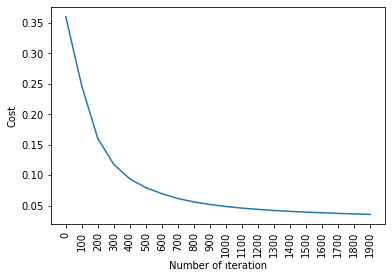

train accuracy: 97.22222222222223 %
test accuracy: 90.625 %


In [37]:
def two_layer_ANN_model(x_train, y_train, x_test, y_test, number_of_iteration):
    cost_list = []
    index = []
    parameters = parameter_initialize(x_train,y_train)
    for i in range(number_of_iteration):
        A2, results = forward_propagation(x_train,parameters)
        cost_result = cost(A2,y_train)
        gradients = backward_propagation(parameters,results,x_train,y_train)
        parameters = update_prameters(parameters, gradients)
        
        if i % 100 == 0:
            cost_list.append(cost_result)
            index.append(i)
            print("Cost after iteration %i %f" %(i,cost_result))
    plt.plot(index,cost_list)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of ıteration")
    plt.ylabel("Cost")
    plt.show()
    y_prediction_test = prediction(parameters,x_test)
    y_prediction_train = prediction(parameters,x_train)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters
parameters = two_layer_ANN_model(x_train,y_train,x_test,y_test,2000)

## Thank You